<a href="https://www.kaggle.com/code/mh0386/product-recommendation?scriptVersionId=137972524" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from sklearn.preprocessing import LabelEncoder
from surprise.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('/kaggle/input/amazon-sales-dataset/amazon.csv')
data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [3]:
data = data.drop(columns='product_name')
data = data.drop(columns='category')
data = data.drop(columns='discounted_price')
data = data.drop(columns='actual_price')
data = data.drop(columns='discount_percentage')
data = data.drop(columns='about_product')
data = data.drop(columns='user_name')
data = data.drop(columns='review_id')
data = data.drop(columns='review_title')
data = data.drop(columns='review_content')
data = data.drop(columns='img_link')
data = data.drop(columns='product_link')
data = data.drop(columns='rating_count')

In [4]:
data

,product_id,rating,user_id
0,B07JW9H4J1,4.2,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB..."
1,B098NS6PVG,4.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX..."
2,B096MSW6CT,3.9,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ..."
3,B08HDJ86NZ,4.2,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S..."
4,B08CF3B7N1,4.2,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH..."
...,...,...,...
1460,B08L7J3T31,4,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U..."
1461,B01M6453MB,4.1,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH..."
1462,B009P2LIL4,3.6,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ..."
1463,B00J5DYCCA,4,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS..."


In [5]:
data.isnull().sum()

product_id    0
rating        0
user_id       0
dtype: int64

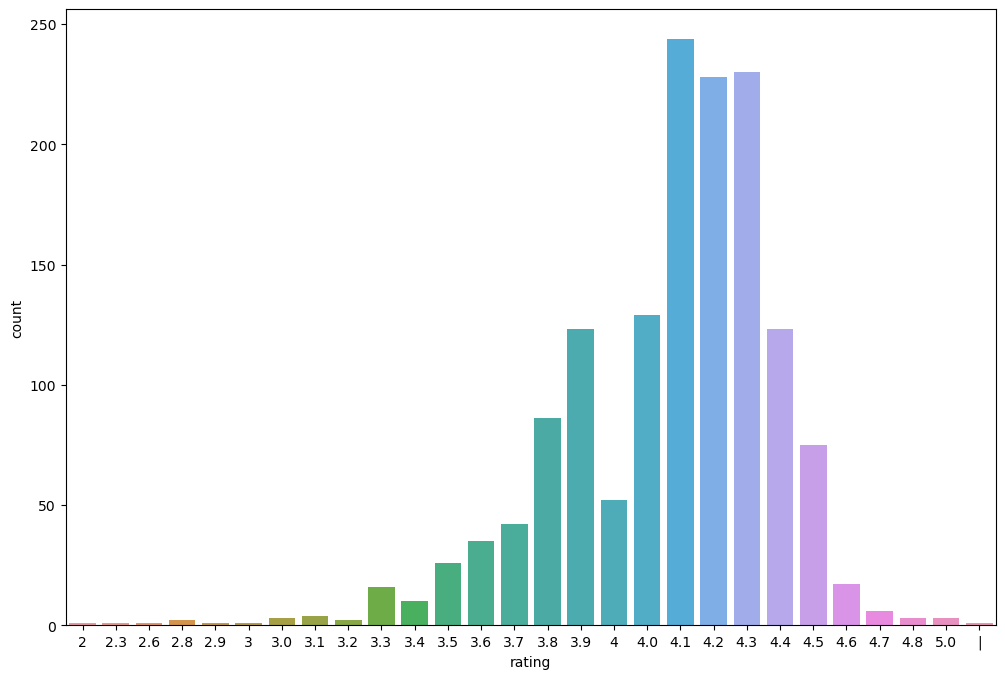

In [6]:
# Check the distribution of the rating
plt.figure(figsize=(12, 8))
sns.countplot(data, x=data.rating.sort_values())
plt.show()

In [7]:
data = data.dropna()

In [8]:
data.product_id = LabelEncoder().fit_transform(data.product_id)
data.user_id = LabelEncoder().fit_transform(data.user_id)

In [9]:
data

,product_id,rating,user_id
0,346,4.2,623
1,848,4.0,88
2,819,3.9,849
3,643,4.2,254
4,588,4.2,17
...,...,...,...
1460,673,4,1050
1461,201,4.1,425
1462,27,3.6,865
1463,61,4,300


In [10]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data, reader)

In [11]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3, random_state=10)

In [12]:
trainset

In [13]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
model = KNNWithMeans(k=10,verbose=True)
model.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [14]:
# run the trained model against the testset
test_pred = model.test(testset)
test_pred

[Prediction(uid=184, iid='3.9', r_ui=1150.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=167, iid='4.2', r_ui=545.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=1081, iid='3.8', r_ui=437.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=38, iid='4.2', r_ui=83.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=437, iid='4', r_ui=1084.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=458, iid='4.3', r_ui=174.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=1141, iid='4.3', r_ui=537.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=810, iid='4.0', r_ui=1140.0, est=5, details={'actual_k': 10, 'was_impossible': False}),


In [15]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred)
accuracy.mse(test_pred)

Item-based Model : Test Set
RMSE: 671.4921
MSE: 450901.6795


450901.67954545456